In [5]:
import os
base_path = "../data/test_data/"
# Liste von Namen
names_list = ["Christoph_Haerdl", "Johannnes_Rothe", "Paul_Hannig",
              "Leon_Hagn", "Roland_Hildwein", "Adem_wannes",
              "David_Schneid", "christoph_käsweber", "Emil_Berent",
              "Mike_Figas", "Lorenz_Falcioni", "Markus_Schmidhuber",
              "Georg_Mages", "Pechtl_Fabian", "Philipp_Christoph",]

# Liste von Pfaden
end_paths = ["0_Christoph_Haerdl.tsv", "1_Johannes_Rothe.tsv", "2_Paul_Hannig.tsv",
              "3_Leon_Hagn.tsv", "4_Roland_Hildwein.tsv", "5_Adem_wannes.tsv",
              "6_David_Schneid.tsv", "7_christoph_käsweber.tsv", "8_Emil_Berent.tsv",
              "9_Mike_Figas.tsv", "10_Lorenz_Falcioni.tsv", "11_Markus_Schmidhuber.tsv",
              "12_Georg_Mages.tsv", "13_Pechtl_Fabian.tsv", "14_Philipp_Christoph.tsv"]

full_paths = []
# Zusammenfügen der Pfade
for end_path in end_paths:
    full_path = os.path.join(base_path, end_path)
    full_paths.append(full_path)

In [6]:
from set_eye_tracking_cooking_recipes.entities.test import Test
from set_eye_tracking_cooking_recipes.entities.test_data import TestData
from set_eye_tracking_cooking_recipes.entities.test_person import TestPerson
from set_eye_tracking_cooking_recipes.entities.test_aoi_metrics import TestAoiMetrics

# Liste für die Test-Klassen
test_classes = []

for name, full_path in zip(names_list, full_paths):
    test_data = TestData(file_path=full_path)
    test_aoi_metrics = TestAoiMetrics(file_path="../data/set_eye_tracking_cooking_recipes_Metrics.tsv", id=test_data.id, Testperson=name)
    test_person = TestPerson(surveys_file_path="../data/surveys.csv", id=test_data.id)
    test = Test(test_person=test_person, test_data=test_data, test_aoimetrics=test_aoi_metrics)
    
    # Hinzufügen der erstellten Klasse zur Liste
    test_classes.append(test)
    
# Beispielhaftes Drucken der Test-Klassenliste
for idx, test_class in enumerate(test_classes):
    print(f"Test Class {idx}: {test_class}")
    print(test_class.test_aoimetrics.aois_hawai_total_duration_of_fixations)
    print(test_class.test_person.name)

D:\Git\set_eye_tracking_cooking_recipes\set_eye_tracking_cooking_recipes\entities\test_data.py:44: DtypeWarning: Columns (37,38,65,66,67,68,69,70,72,84,85) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, delimiter='\t')
D:\Git\set_eye_tracking_cooking_recipes\set_eye_tracking_cooking_recipes\entities\test_data.py:44: DtypeWarning: Columns (37,38,65,66,67,68,69,70,72,84,85) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, delimiter='\t')
D:\Git\set_eye_tracking_cooking_recipes\set_eye_tracking_cooking_recipes\entities\test_data.py:44: DtypeWarning: Columns (37,38,65,66,67,68,69,70,72,84,85) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, delimiter='\t')
D:\Git\set_eye_tracking_cooking_recipes\set_eye_tracking_cooking_recipes\entities\test_data.py:44: DtypeWarning: Columns (37,38,65,66,67,68,69,70,72,84,85) have mixed types

Test Class 0: <set_eye_tracking_cooking_recipes.entities.test.Test object at 0x000002C1B36481F0>
[  800     0     0     0     0  6957   727 20817]
Christoph Haerdl
Test Class 1: <set_eye_tracking_cooking_recipes.entities.test.Test object at 0x000002C1B34F6F80>
[ 3397     0     0     0     0 11557     0 14311]
Johannes Rothe
Test Class 2: <set_eye_tracking_cooking_recipes.entities.test.Test object at 0x000002C1B349A590>
[ 5580  1663   403     0     0  6957   470 14413]
Paul Hannig
Test Class 3: <set_eye_tracking_cooking_recipes.entities.test.Test object at 0x000002C1B349A560>
[ 1800  2553   293   290     0  5070   407 20007]
Leon Hagn
Test Class 4: <set_eye_tracking_cooking_recipes.entities.test.Test object at 0x000002C1B36069E0>
[ 7577  1380   893     0   293  5591  1290 10860]
Roland Hildwein
Test Class 5: <set_eye_tracking_cooking_recipes.entities.test.Test object at 0x000002C1B3607700>
[ 1257   570   327   153     0  4603   100 13350]
Adem Wannes
Test Class 6: <set_eye_tracking_cook

drin
[array([ 3793,     0,     0,     0,     0,  7870,     0, 15263]), array([ 2213,     0,     0,     0,     0, 11060,   167, 13362]), array([ 4892,   557,     0,     0,     0, 11503,   393, 11287]), array([ 2407,   325,     0,     0,     0,  7683,   330, 17080]), array([ 2260,     0,     0,     0,     0,  9007,     0, 17642]), array([ 3397,     0,     0,     0,     0, 11557,     0, 14311]), array([ 2337,     0,     0,     0,     0, 10693,   110, 16271]), array([  293,     0,     0,     0,     0, 16600,  2153, 10078]), array([ 3942,   260,     0,   440,   320,  5757,   203, 18203]), array([ 1717,     0,     0,     0,     0,  3813,     0, 23191])]
[ 2725.1   114.2     0.     44.     32.   9554.3   335.6 15668.8]
[ 2725   114     0    44    32  9554   336 15669]


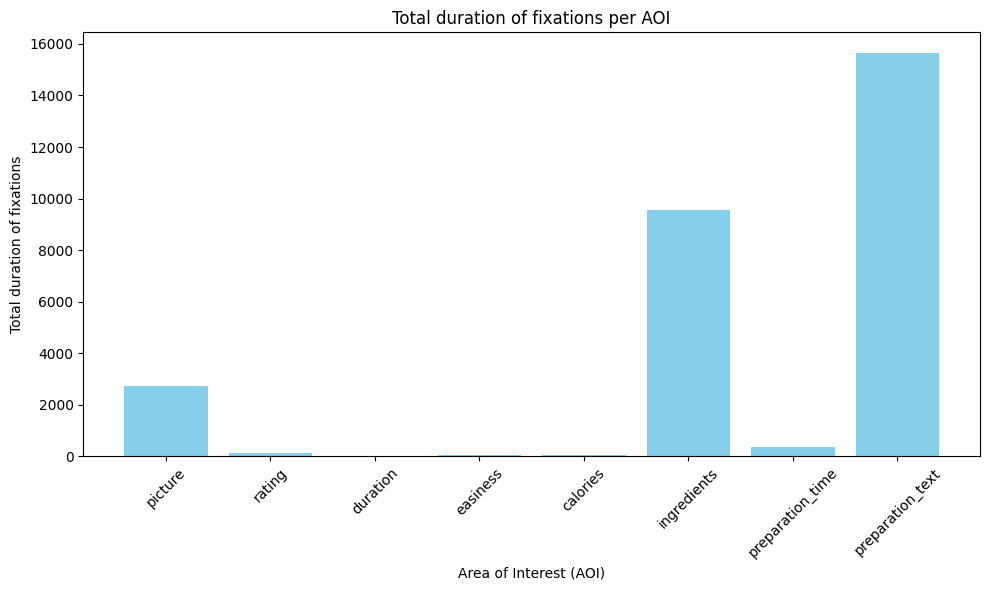

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from set_eye_tracking_cooking_recipes.entities.test_data import AoiIndexes
from set_eye_tracking_cooking_recipes.entities.test import Test

aoi_labels = [aoi.name for aoi in AoiIndexes]
mean_array = test_classes[1].test_aoimetrics.calculate_mean()
print(mean_array)

# Erstellen eines DataFrame aus den geordneten Daten und den entsprechenden Labels
df = pd.DataFrame({'Total_duration_of_fixations': mean_array}, index=aoi_labels)

# Überprüfe, ob das gewünschte Objekt ein Array enthält
#if isinstance(test_classes[0].test_aoimetrics, np.ndarray):
    # Berechne den Mittelwert des Arrays im gewünschten TestAoiMetrics-Objekt
 #   mean_array = np.mean(test_classes[0], axis=0)
  #  print(mean_array)
#else:
 #   print("Das gewünschte Objekt enthält kein Array.")


# Erstellen des Balkendiagramms
plt.figure(figsize=(10, 6))
plt.bar(df.index, df['Total_duration_of_fixations'], color='skyblue')
plt.xlabel('Area of Interest (AOI)')
plt.ylabel('Total duration of fixations')
plt.title('Total duration of fixations per AOI')
plt.xticks(rotation=45)  # Rotieren der Beschriftungen für bessere Lesbarkeit
plt.tight_layout()

# Anzeigen des Diagramms
plt.show()

drin
[array([ 1880,     0,     0,     0,     0, 13373,   293, 11263]), array([  860,     0,     0,     0,     0, 12897,     0, 16218]), array([ 2017,     0,     0,     0,     0, 12960,   442, 14151]), array([ 2059,     0,     0,     0,     0, 10577,   737, 13050]), array([ 1527,     0,     0,     0,     0, 11733,  1260,  8000]), array([  800,     0,     0,     0,     0,  6957,   727, 20817]), array([ 1853,     0,     0,     0,     0, 12397,   403, 12915]), array([ 2083,     0,     0,     0,     0,  8413,  1133, 18623]), array([  910,   233,     0,     0,     0,  6793,   147, 21870]), array([ 2270,     0,     0,     0,     0,  6943,   613, 14427])]
[ 1625.9    23.3     0.      0.      0.  10304.3   575.5 15133.4]
drin
[array([ 6467,  1073,   263,   163,     0,  9673,   607, 11960]), array([ 5232,  1137,   667,   537,     0, 13457,   230,  8968]), array([ 6759,  1240,  1067,  1423,  1287, 12063,  1267,   860]), array([ 4610,  2340,   947,   547,   700,  5973,  2183, 12127]), array([ 7483

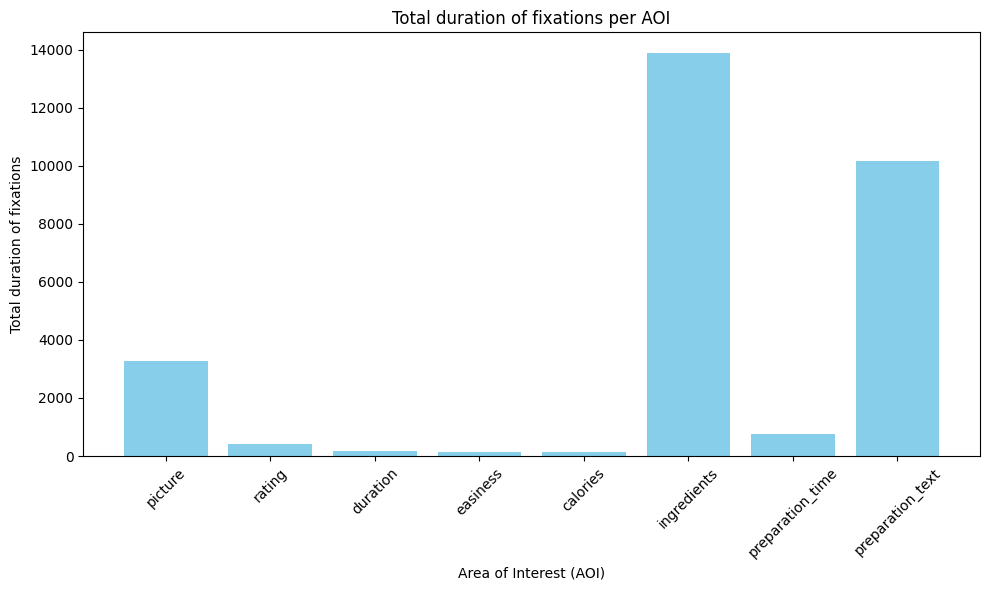

In [35]:
mean_arrays = []
for test_class in test_classes:
        if test_class.test_person.attention_to_nutrition == False:  # Ändere das Attribut entsprechend deiner Klassenstruktur
            try:
                mean_array = test_class.test_aoimetrics.calculate_mean()
                mean_arrays.append(mean_array)
            except ValueError as e:
                print(e)

# Berechne den Mittelwert über die berechneten Mittelwert-Arrays

if mean_arrays:
    overall_mean = np.mean(mean_arrays, axis=0)

print(overall_mean)

df = pd.DataFrame({'Total_duration_of_fixations': overall_mean}, index=aoi_labels)

# Erstellen des Balkendiagramms
plt.figure(figsize=(10, 6))
plt.bar(df.index, df['Total_duration_of_fixations'], color='skyblue')
plt.xlabel('Area of Interest (AOI)')
plt.ylabel('Total duration of fixations')
plt.title('Total duration of fixations per AOI')
plt.xticks(rotation=45)  # Rotieren der Beschriftungen für bessere Lesbarkeit
plt.tight_layout()

# Anzeigen des Diagramms
plt.show()

In [4]:
test.print_mean_of_nutrition(list_of_tests=test_classes, paysattention=True)

TypeError: Test.print_mean_of_nutrition() missing 1 required positional argument: 'self'